In [81]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

print('Libraries Imported!')

Libraries Imported!


In [3]:
df = pd.read_csv('car_prices.csv')


In [400]:
df1 = df.copy()

df1.dtypes
df1.shape

(558837, 16)

In [229]:
df1.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [232]:
df1['year'].nunique()
df1['year'].isnull().sum()

0

In [234]:
df1['make'].nunique()
df1['make'].isnull().sum()

10301

In [235]:
df1['trim'].nunique()
df1['trim'].isnull().sum()

10651

In [238]:
df1['body'].nunique()
# df1['body'].describe()
df1['body'].isnull().sum()

13195

In [240]:
df1['transmission'].unique()
#df1['transmission'].describe()
df1['transmission'].isnull().sum()

65352

In [242]:
df1['model'].unique()
df1['model'].isnull().sum()

10399

In [244]:
df1['vin'].nunique()
df1['vin'].isnull().sum()

4

In [245]:
df1['state'].nunique()
df1['state'].isnull().sum()

0

In [248]:
df1['condition'].nunique()
df1['condition'].isnull().sum()
# print(df1['condition'].max())
# print(df['condition'].min())

11820

In [250]:
df1['odometer'].nunique()
df1['odometer'].isnull().sum()

94

In [311]:
df1['color'].nunique()
df1['color'].isnull().sum()

749

In [317]:
df1['interior'].nunique()
df1['interior'].isnull().sum()

749

In [256]:
df1['seller'].nunique()
df1['seller'].isnull().sum()

0

In [258]:
df1['mmr'].nunique()
df1['mmr'].isnull().sum()

38

In [260]:
df1['sellingprice'].nunique()
df1['sellingprice'].isnull().sum()

12

In [262]:
df1['saledate'].nunique()
df1['saledate'].isnull().sum()

12

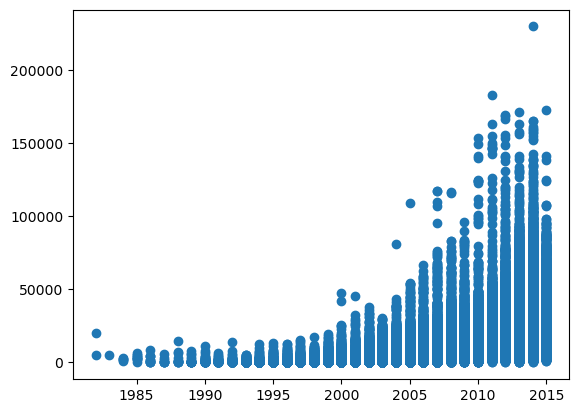

In [264]:
plt.scatter(x = df['year'], y = df['sellingprice'])

<Axes: xlabel='transmission', ylabel='sellingprice'>

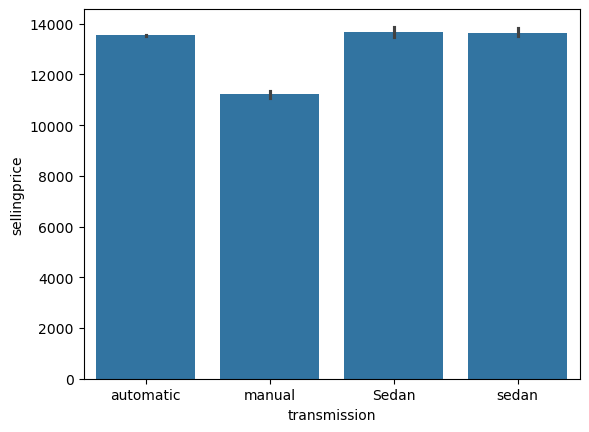

In [266]:
sns.barplot(x = df1['transmission'], y = df1['sellingprice'])

In [267]:
df1['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

## Because this is a categorical value and the difference between Manual and Auto is huge, I'll use Mod and replace the values of the null values with Automatic 

In [402]:
df1['transmission'].fillna('automatic', inplace= True)

df1['transmission'].isnull().sum()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_48525/4186971295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['transmission'].fillna('automatic', inplace= True)


0

In [404]:
unwanted = df1[(df1['transmission'] == 'Sedan') | (df1['transmission'] == 'sedan')].index
df1.drop(unwanted, inplace= True)

df1['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

## Now we have the values that are relavent so we can visualize this data easily.

<Axes: xlabel='transmission', ylabel='sellingprice'>

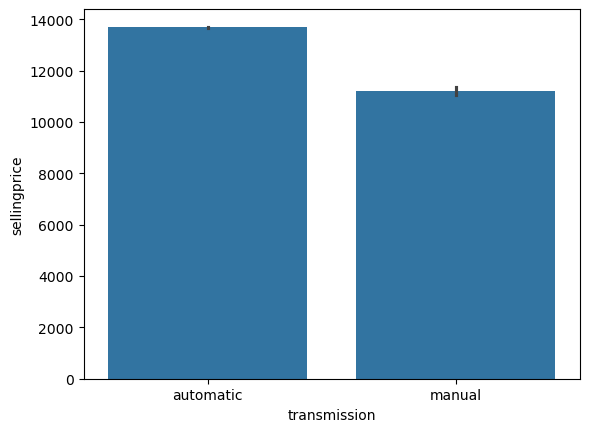

In [272]:
sns.barplot( x = df1['transmission'], y = df1['sellingprice'])

## The condition value has to be fixed next 

In [406]:
df1['condition'].replace(range(10, 21), 1, inplace=True)
df1['condition'].replace(range(20, 31), 2, inplace=True)
df1['condition'].replace(range(30, 41), 3, inplace=True)
df1['condition'].replace(range(40, 51), 4, inplace=True)

df1['condition'].value_counts()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_48525/3684880069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['condition'].replace(range(10, 21), 1, inplace=True)
/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_48525/3684880069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

condition
4.0    179895
3.0    172479
2.0    132490
1.0     50931
5.0     11222
Name: count, dtype: int64

In [408]:
df1['condition'].fillna(avg_cond, inplace= True)

df1['condition'].isnull().sum()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_48525/3669966273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['condition'].fillna(avg_cond, inplace= True)


11794

<Axes: xlabel='condition', ylabel='sellingprice'>

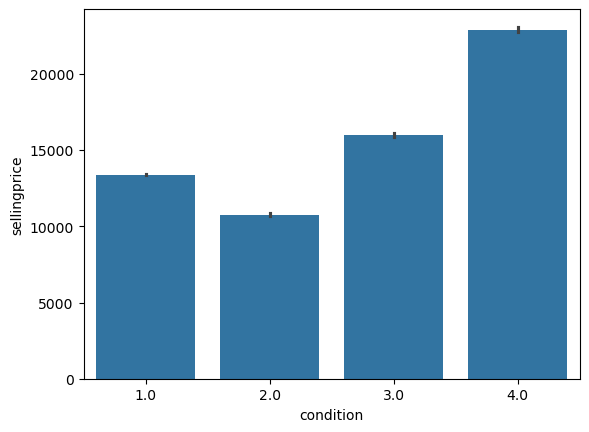

In [224]:
# sns.regplot(x = df1['condition'], y = df1['sellingprice'])
sns.barplot(x = df1['condition'], y = df1['sellingprice'])

In [410]:
df['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [412]:
unwnated_color = df1[(df1['color'] == '9562') | (df1['color'] == '2846') | (df1['color'] == '18561') | (df1['color'] == '18384') | (df1['color'] == '5705') | 
(df1['color'] == '2817') | (df1['color'] == '6158') | (df1['color'] == '721') | (df1['color'] == '20627') | (df1['color'] == '20379') | 
(df1['color'] == '9837') | (df1['color'] == '9887') | (df1['color'] == '2172') |( df1['color'] == '339') | (df1['color'] == '6864') |
(df1['color'] == '2711') | (df1['color'] == '11034') | (df1['color'] == '16633') | (df1['color'] == '6388') | (df1['color'] == '15719') |
(df1['color'] == '12655') | (df1['color'] == '14872') | (df1['color'] == '1167') | (df1['color'] == '9410')|
(df1['color'] == '4802') | (df1['color'] == '5001')].index

unwnated_color

df1.drop(unwnated_color, inplace= True)

df1.color.value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

## Got rid of the unwanted rows but there's still one '-' that needs to be replaced 

In [446]:
df1['color'] = df1['color'].replace('—' , 'other')



In [448]:
df1['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
other         24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
nan             749
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

<Axes: ylabel='color'>

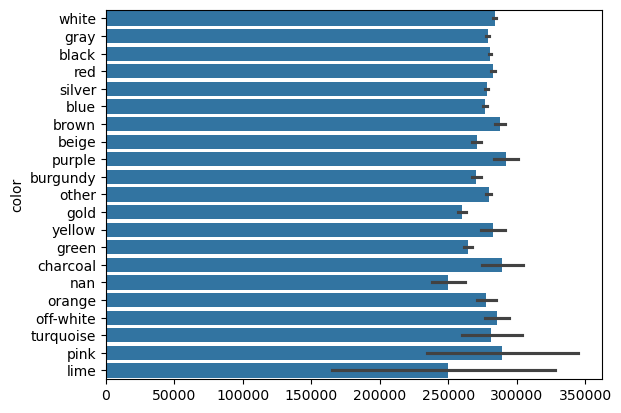

In [480]:
sns.barplot(df1['color'])